# Optimization

## 1d example

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

def show_trace(res):
    n = max(abs(min(res)), abs(max(res)))
    f_line = np.arange(-n, n, 0.01)
    plt.plot(f_line, [f(x) for x in f_line], label="x")
    plt.plot(res, [f(x) for x in res], '-o', label="f(x)")
    plt.legend()


def f(x):     return x**2  # objective function
def gradf(x): return 2 * x # its derivative

#c = 0.15 * math.pi
#def f(x):     return x*math.cos(c * x)
#def gradf(x): return math.cos(c * x) - c * x * math.sin(c * x)

x:     -2.829972486377703
f(x):  8.008744273654798


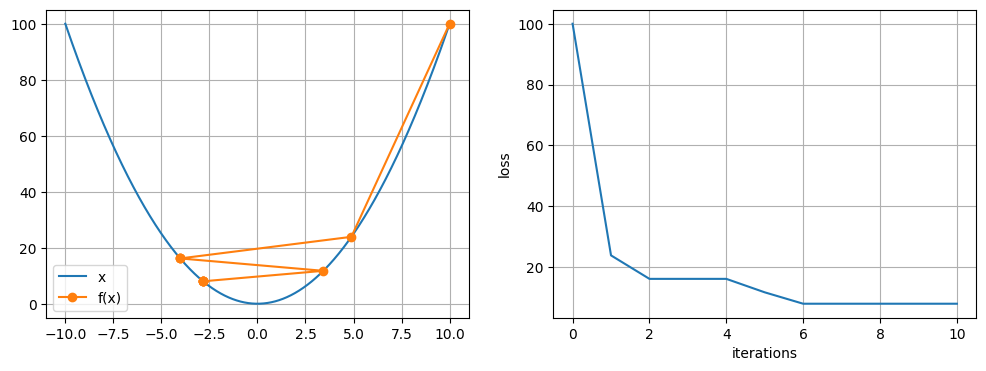

In [2]:
#simple random search

def rand(x0, x_low, x_high, steps):
    x = x0
    best = f(x0)
    results = [x]
    results_error = [best]
    for i in range(steps):
        x_n = np.random.uniform(x_low, x_high)
        if f(x_n) < best:
            x = x_n
            best = f(x_n)
        results.append(x)
        results_error.append(best)
    print ('x:    ' ,x)
    print ('f(x): ', f(x))
    return results, results_error

steps = 10
res_rand = rand(10, -10, 10, steps)

plt.figure(figsize=[12, 4]);
plt.subplot(1,2,1)
show_trace(res_rand[0])
plt.grid()
plt.subplot(1,2,2)
plt.plot (range(steps+1), res_rand[1])
plt.grid()
plt.xlabel("iterations"), plt.ylabel ("loss");

x:     8.217355454793292
f(x):  67.52493067042107


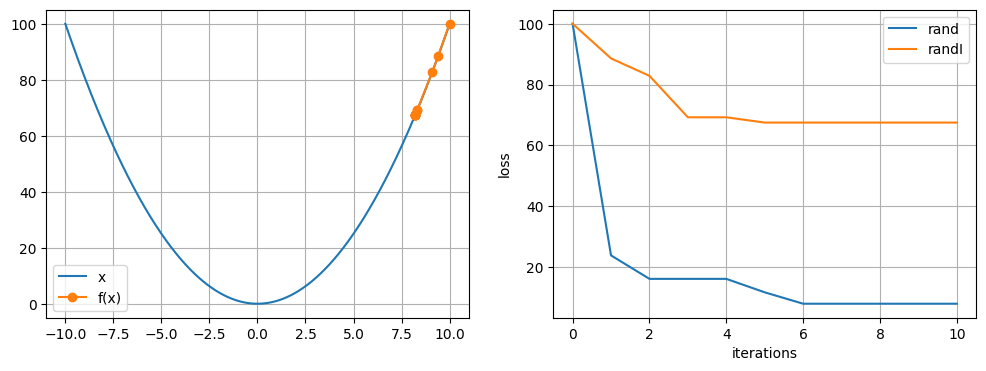

In [3]:
#random search (incremental steps)
def rand2(x0, r, steps):
    x = x0
    best = f(x0)
    results = [x]
    results_error = [best]
    for i in range(steps):
        x_n = x + np.random.uniform(-r, r)
        if f(x_n) < best:
            x = x_n
            best = f(x_n)
        results.append(x)
        results_error.append(best)
    print ('x:    ' ,x)
    print ('f(x): ', f(x))
    return results, results_error

res_rand2 = rand2(10, 1, steps)

plt.figure(figsize=[12, 4]);
plt.subplot(1,2,1)
show_trace(res_rand2[0])
plt.grid()
plt.subplot(1,2,2)
plt.plot (range(steps+1), res_rand[1], label="rand")
plt.plot (range(steps+1), res_rand2[1], label="randI")
plt.legend()
plt.grid()
plt.xlabel("iterations"), plt.ylabel ("loss");


x:     0.06046617599999997
f(x):  0.0036561584400629722


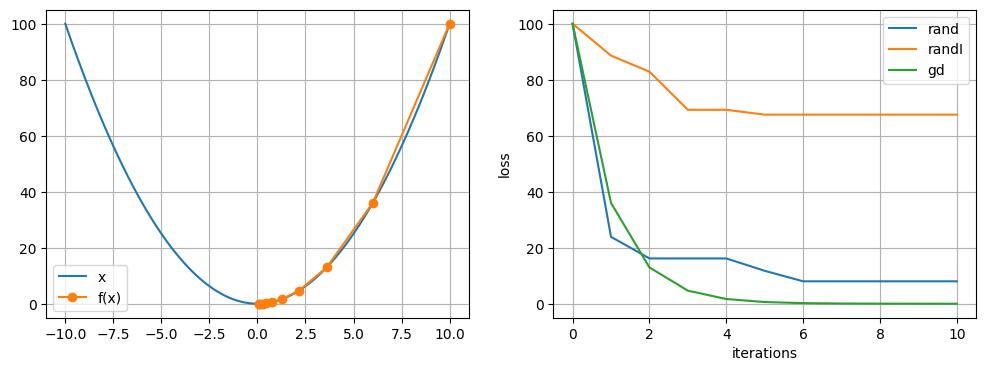

In [4]:
#gradient descent

def gd(x0, eta, steps):
    x = x0
    results = [x]
    results_error = [f(x)]
    for i in range(steps):
        x = x - eta * gradf(x)
        results.append(x)
        results_error.append(f(x))
    print('x:    ', x)
    print('f(x): ', f(x))
    return results, results_error

res_gd = gd(10, 0.2, steps)  #good
#res_gd = gd(10, 0.02, steps) #too small
#res_gd = gd(10, 0.8, steps)  #too large -- lucky
#res_gd = gd(10, 1, steps)    #too large -- cycle
#res_gd = gd(10, 1.01, steps) #much too large

plt.figure(figsize=[12, 4]);
plt.subplot(1,2,1)
show_trace(res_gd[0])
plt.grid()
plt.subplot(1,2,2)
plt.plot (range(steps+1), res_rand[1], label="rand")
plt.plot (range(steps+1), res_rand2[1], label="randI")
plt.plot (range(steps+1), res_gd[1], label="gd")
plt.legend()
plt.grid()
plt.xlabel("iterations"), plt.ylabel ("loss");

## 2d example

x:       1.788429729717521
y:       -0.08851231599300746
f(x,y):  3.214149758302377
x:       -0.0012340709690552565
y:       -0.10772585536994761
f(x,y):  0.023211242761530408
x:       0.00026561398887587435
y:       2.0370359763344878e-09
f(x,y):  7.055079109485213e-08


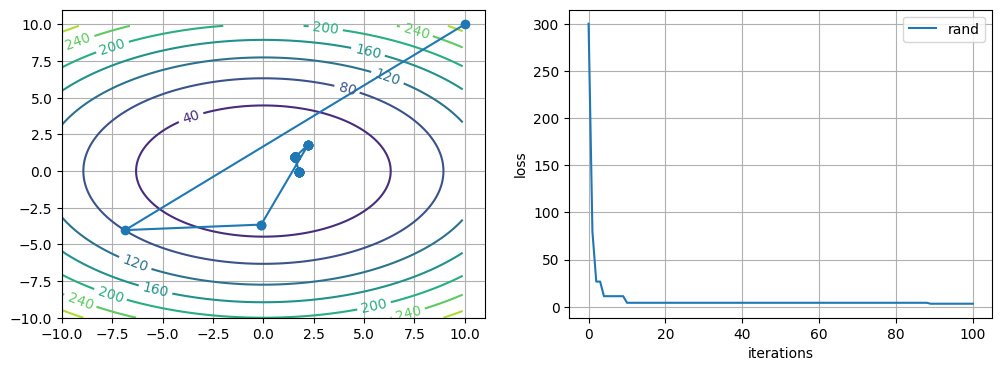

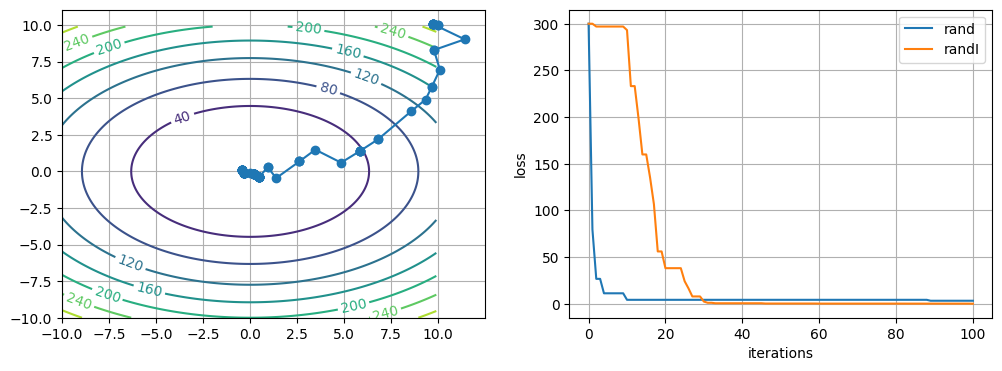

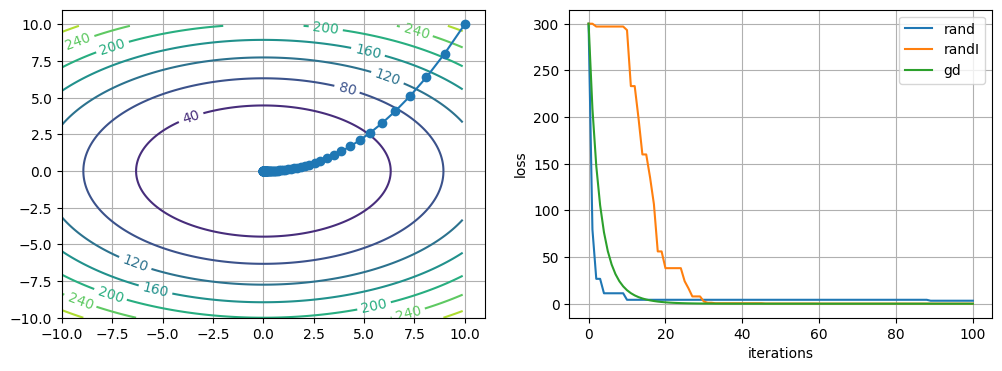

In [5]:
def show_trace2d(res):
    n = 10
    x_line = np.arange(-n, n, 0.1)
    y_line = np.arange(-n, n, 0.1)
    X, Y = np.meshgrid(x_line, y_line)
    F = f(X,Y)
    cp = plt.contour(X,Y,F)
    plt.clabel(cp, inline=True, fontsize=10)
    plt.plot([i[0] for i in res], [i[1] for i in res], '-o')

def f(x,y):     return x**2 + 2*y**2
def gradf_x(x,y): return 2*x
def gradf_y(x,y): return 4*y

def rand_2d(x0, y0, x_low, x_high, y_low, y_high, steps):
    x = x0
    y = y0
    best = f(x0,y0)
    results = [(x,y)]
    results_error = [best]
    for i in range(steps):
        x_n = np.random.uniform(x_low, x_high)
        y_n = np.random.uniform(y_low, y_high)
        if f(x_n,y_n) < best:
            x = x_n
            y = y_n
            best = f(x_n,y_n)
        results.append((x,y))
        results_error.append(best)
    print ('x:      ' ,x)
    print ('y:      ', y)
    print ('f(x,y): ', f(x,y))
    return results, results_error

def rand2(x0, y0, r, steps):
    x = x0
    y = y0
    best = f(x0,y0)
    results = [(x,y)]
    results_error = [best]
    for i in range(steps):
        x_n = x + np.random.uniform(-r, r)
        y_n = y + np.random.uniform(-r, r)
        if f(x_n,y_n) < best:
            x = x_n
            y = y_n
            best = f(x_n, y_n)
        results.append((x,y))
        results_error.append(best)
    print ('x:      ' ,x)
    print ('y:      ', y)
    print ('f(x,y): ', f(x,y))
    return results, results_error

def gd_2d(x0, y0, eta, steps):
    x = x0
    y = y0
    results = [(x,y)]
    results_error = [f(x,y)]
    for i in range(steps):
        x -= eta * gradf_x(x,y)
        y -= eta * gradf_y(x,y)
        results.append((x,y))
        results_error.append(f(x,y))
    print('x:      ', x)
    print('y:      ', y)
    print('f(x,y): ', f(x,y))
    return results, results_error


steps= 100
res_rand = rand_2d(10,10, -10, 10, -10, 10, steps)

plt.figure(figsize=[12, 4]);
plt.subplot(1,2,1)
show_trace2d(res_rand[0])
plt.grid()
plt.subplot(1,2,2)
plt.plot (range(steps+1), res_rand[1], label="rand")
plt.legend()
plt.grid()
plt.xlabel("iterations"), plt.ylabel ("loss");

res_rand2 = rand2(10, 10, 2, steps)

plt.figure(figsize=[12, 4]);
plt.subplot(1,2,1)
show_trace2d(res_rand2[0])
plt.grid()
plt.subplot(1,2,2)
plt.plot (range(steps+1), res_rand[1], label="rand")
plt.plot (range(steps+1), res_rand2[1], label='randI')
plt.legend()
plt.grid()
plt.xlabel("iterations"), plt.ylabel ("loss");

res_gd = gd_2d(10, 10, 0.05, steps)

plt.figure(figsize=[12, 4]);
plt.subplot(1,2,1)
show_trace2d(res_gd[0])
plt.grid()
plt.subplot(1,2,2)
plt.plot (range(steps+1), res_rand[1], label="rand")
plt.plot (range(steps+1), res_rand2[1], label='randI')
plt.plot (range(steps+1), res_gd[1], label='gd')
plt.legend()
plt.grid()
plt.xlabel("iterations"), plt.ylabel ("loss");